In [1]:
import pandas as pd 
import numpy as np

data = pd.read_csv('Airlines_graph.csv')

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
data.shape

data.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
dtype: object

In [3]:
data.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance
0,2013,2,26,1807.0,1630,97.0,1956.0,1837,79.0,EV,4411,N13566,EWR,MEM,144.0,946
1,2013,8,17,1459.0,1445,14.0,1801.0,1747,14.0,B6,1171,N661JB,LGA,FLL,147.0,1076
2,2013,2,13,1812.0,1815,-3.0,2055.0,2125,-30.0,AS,7,N403AS,EWR,SEA,315.0,2402
3,2013,4,11,2122.0,2115,7.0,2339.0,2353,-14.0,B6,97,N656JB,JFK,DEN,221.0,1626
4,2013,8,5,1832.0,1835,-3.0,2145.0,2155,-10.0,AA,269,N3EYAA,JFK,SEA,358.0,2422


In [4]:
nx.__version__

'2.4'

In [5]:
# converting sched_dep_time to 'std' - Scheduled time of departure
data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

In [6]:
data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,std
0,2013,2,26,1807.0,1630,97.0,1956.0,1837,79.0,EV,4411,N13566,EWR,MEM,144.0,946,16:30:00
1,2013,8,17,1459.0,1445,14.0,1801.0,1747,14.0,B6,1171,N661JB,LGA,FLL,147.0,1076,14:45:00
2,2013,2,13,1812.0,1815,-3.0,2055.0,2125,-30.0,AS,7,N403AS,EWR,SEA,315.0,2402,18:15:00
3,2013,4,11,2122.0,2115,7.0,2339.0,2353,-14.0,B6,97,N656JB,JFK,DEN,221.0,1626,21:15:00
4,2013,8,5,1832.0,1835,-3.0,2145.0,2155,-10.0,AA,269,N3EYAA,JFK,SEA,358.0,2422,18:35:00


In [7]:
# converting sched_arr_time to 'sta' - Scheduled time of arrival
data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

# converting dep_time to 'atd' - Actual time of departure
data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

In [8]:
# converting arr_time to 'ata' - Actual time of arrival
data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

In [9]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

In [10]:
# finally we drop the columns we don't need
data = data.drop(columns = ['year', 'month', 'day'])

In [11]:
data.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,std,sta,atd,ata,date
0,1807.0,1630,97.0,1956.0,1837,79.0,EV,4411,N13566,EWR,MEM,144.0,946,16:30:00,18:37:00,18:07:00,19:56:00,2013-02-26
1,1459.0,1445,14.0,1801.0,1747,14.0,B6,1171,N661JB,LGA,FLL,147.0,1076,14:45:00,17:47:00,14:59:00,18:01:00,2013-08-17
2,1812.0,1815,-3.0,2055.0,2125,-30.0,AS,7,N403AS,EWR,SEA,315.0,2402,18:15:00,21:25:00,18:12:00,20:55:00,2013-02-13
3,2122.0,2115,7.0,2339.0,2353,-14.0,B6,97,N656JB,JFK,DEN,221.0,1626,21:15:00,23:53:00,21:22:00,23:39:00,2013-04-11
4,1832.0,1835,-3.0,2145.0,2155,-10.0,AA,269,N3EYAA,JFK,SEA,358.0,2422,18:35:00,21:55:00,18:32:00,21:45:00,2013-08-05


In [12]:
FG = nx.from_pandas_edgelist(data, source='origin', target='dest', edge_attr=True,)

In [13]:
FG.nodes()

NodeView(('EWR', 'MEM', 'LGA', 'FLL', 'SEA', 'JFK', 'DEN', 'ORD', 'MIA', 'PBI', 'MCO', 'CMH', 'MSP', 'IAD', 'CLT', 'TPA', 'DCA', 'SJU', 'ATL', 'BHM', 'SRQ', 'MSY', 'DTW', 'LAX', 'JAX', 'RDU', 'MDW', 'DFW', 'IAH', 'SFO', 'STL', 'CVG', 'IND', 'RSW', 'BOS', 'CLE'))

In [14]:
FG.edges()

EdgeView([('EWR', 'MEM'), ('EWR', 'SEA'), ('EWR', 'MIA'), ('EWR', 'ORD'), ('EWR', 'MSP'), ('EWR', 'TPA'), ('EWR', 'MSY'), ('EWR', 'DFW'), ('EWR', 'IAH'), ('EWR', 'SFO'), ('EWR', 'CVG'), ('EWR', 'IND'), ('EWR', 'RDU'), ('EWR', 'IAD'), ('EWR', 'RSW'), ('EWR', 'BOS'), ('EWR', 'PBI'), ('EWR', 'LAX'), ('EWR', 'MCO'), ('EWR', 'SJU'), ('LGA', 'FLL'), ('LGA', 'ORD'), ('LGA', 'PBI'), ('LGA', 'CMH'), ('LGA', 'IAD'), ('LGA', 'CLT'), ('LGA', 'MIA'), ('LGA', 'DCA'), ('LGA', 'BHM'), ('LGA', 'RDU'), ('LGA', 'ATL'), ('LGA', 'TPA'), ('LGA', 'MDW'), ('LGA', 'DEN'), ('LGA', 'MSP'), ('LGA', 'DTW'), ('LGA', 'STL'), ('LGA', 'MCO'), ('LGA', 'CVG'), ('LGA', 'IAH'), ('FLL', 'JFK'), ('SEA', 'JFK'), ('JFK', 'DEN'), ('JFK', 'MCO'), ('JFK', 'TPA'), ('JFK', 'SJU'), ('JFK', 'ATL'), ('JFK', 'SRQ'), ('JFK', 'DCA'), ('JFK', 'DTW'), ('JFK', 'LAX'), ('JFK', 'JAX'), ('JFK', 'CLT'), ('JFK', 'PBI'), ('JFK', 'CLE'), ('JFK', 'IAD'), ('JFK', 'BOS')])

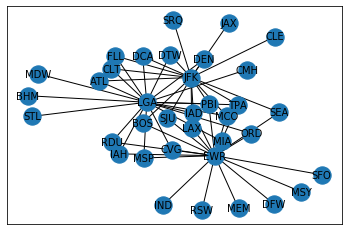

In [15]:
# Visualize the network of flights 
nx.draw_networkx(FG, node_size = 300, font_size=10)

In [16]:
nx.algorithms.degree_centrality(FG) # Notice the 3 airports from which all of our 100 rows of data originates

# Calculate average edge density of the Graph
nx.density(FG)

0.09047619047619047

In [17]:
nx.average_shortest_path_length(FG) # Average shortest path length for ALL paths in the Graph

2.36984126984127

In [18]:
nx.average_degree_connectivity(FG) # For a node of degree k - What is the average of its neighbours' degree?

{20: 1.95, 1: 19.307692307692307, 2: 19.0625, 17: 2.0588235294117645, 3: 19.0}

In [19]:
# Let us find all the paths available
for path in nx.all_simple_paths(FG, source='JAX', target='DFW'):
    print(path)

['JAX', 'JFK', 'DEN', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MCO', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK', 'SEA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK',

In [20]:
# Let us find the dijkstra path from JAX to DFW.
# Here's an in-depth article on how dijkstra works - https://courses.csail.mit.edu/6.006/fall11/lectures/lecture16.pdf
dijpath = nx.dijkstra_path(FG, source='JAX', target='DFW')
dijpath

['JAX', 'JFK', 'SEA', 'EWR', 'DFW']

In [21]:
# Let us try to find the dijkstra path weighted by airtime (approximate case)
shortpath = nx.dijkstra_path(FG, source='JAX', target='DFW', weight='air_time')
shortpath

['JAX', 'JFK', 'BOS', 'EWR', 'DFW']



2. How many maximal cliques we can spot in this airline network? (20 Points)

3. List the most busiest/popular airport. (20 Points) 

4. As a thought leader, identify 6 new routes to recommend. Hint: Think if the pairs are symmetric or not and make your assumption/observation accordingly i.e. whether ORD-LAX and LAX-ORD two separate routes? (50 Points)



## Number of maximal cliques in this airline network 

In [22]:
# Calculate the maximal cliques
cliques = nx.find_cliques(FG)

# Count and print the number of maximal cliques in FG
print(len(list(cliques)))

# There are 57 maximal cliques we can spot in this airline network.

57


## The most busiest/popular airport

In [23]:
# Compute the degree centralities of FG 
deg_cent = nx.degree_centrality(FG)

# Compute the maximum degree centrality
max_dc = max(deg_cent.values())

# Find the busiest airport
busiest_airport = [n for n, dc in deg_cent.items() if dc == max_dc]
print(busiest_airport)

# Newark and La Guardia are the busiest airports.

['EWR', 'LGA']


## Identify 6 New Routes 

In [24]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in FG
for n, d in FG.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(FG.neighbors(n), 2):
    
        # Check whether n1 and n2 do not have an edge
        if not FG.has_edge(n1, n2):
        
            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 6 routes
all_counts = sorted(recommended.values())
top6_routes = [route for route, count in recommended.items() if count > all_counts[-7]]
print(top6_routes)

[('LGA', 'JFK'), ('EWR', 'JFK'), ('JFK', 'LGA'), ('LGA', 'EWR'), ('EWR', 'LGA'), ('JFK', 'EWR')]


However, setting up routes between these airports do not make sense because they are in the proximity of New York City and are very close distance-wise. So I will continue to find routes to recommend. 

In [25]:
# Drop the NYC routes from recommended
nyc_airport = top6_routes
for i in nyc_airport:
    del recommended[i]

print(recommended)

defaultdict(<class 'int'>, {('MEM', 'SEA'): 1, ('MEM', 'MIA'): 1, ('MEM', 'ORD'): 1, ('MEM', 'MSP'): 1, ('MEM', 'TPA'): 1, ('MEM', 'MSY'): 1, ('MEM', 'DFW'): 1, ('MEM', 'IAH'): 1, ('MEM', 'SFO'): 1, ('MEM', 'CVG'): 1, ('MEM', 'IND'): 1, ('MEM', 'RDU'): 1, ('MEM', 'IAD'): 1, ('MEM', 'RSW'): 1, ('MEM', 'BOS'): 1, ('MEM', 'PBI'): 1, ('MEM', 'LAX'): 1, ('MEM', 'MCO'): 1, ('MEM', 'SJU'): 1, ('SEA', 'MIA'): 1, ('SEA', 'ORD'): 1, ('SEA', 'MSP'): 1, ('SEA', 'TPA'): 2, ('SEA', 'MSY'): 1, ('SEA', 'DFW'): 1, ('SEA', 'IAH'): 1, ('SEA', 'SFO'): 1, ('SEA', 'CVG'): 1, ('SEA', 'IND'): 1, ('SEA', 'RDU'): 1, ('SEA', 'IAD'): 2, ('SEA', 'RSW'): 1, ('SEA', 'BOS'): 2, ('SEA', 'PBI'): 2, ('SEA', 'LAX'): 2, ('SEA', 'MCO'): 2, ('SEA', 'SJU'): 2, ('MIA', 'ORD'): 1, ('MIA', 'MSP'): 2, ('MIA', 'TPA'): 2, ('MIA', 'MSY'): 1, ('MIA', 'DFW'): 1, ('MIA', 'IAH'): 2, ('MIA', 'SFO'): 1, ('MIA', 'CVG'): 2, ('MIA', 'IND'): 1, ('MIA', 'RDU'): 2, ('MIA', 'IAD'): 1, ('MIA', 'RSW'): 1, ('MIA', 'BOS'): 1, ('MIA', 'PBI'): 1, ('M

In [26]:
# Sort recommended based on its values
recommended_sorted = {k: v for k, v in sorted(recommended.items(), key=lambda item: item[1],
                                     reverse=True)}
top_6 = {k: recommended_sorted[k] for k in list(recommended_sorted)[:6]}
print(top_6)

{('SEA', 'TPA'): 2, ('SEA', 'IAD'): 2, ('SEA', 'BOS'): 2, ('SEA', 'PBI'): 2, ('SEA', 'LAX'): 2, ('SEA', 'MCO'): 2}


I‘d like to recommend these 6 routes: SEA - TPA, SEA - IAD, SEA - BOS, SEA - PBI, SEA - LAX, SEA - MCO etc. 